In [1]:
using Statistics
using Distributions
using QuadGK
using Symbolics
using Plots
using DataFrames
using PlotThemes
using Measures
using SpecialFunctions
using BenchmarkTools

include("functions/LaTexTools.jl")
include("functions/original_fractional_moment.jl")
using .LaTexTools
using .FractionalMoments

In [ ]:
#Computing differences between accurate MGF and Caputo-Fabrizio MGF for fractional moments of Exponential Distribution

#Defining parameters of interest
betas = [0.5, 1, 1.5, 2]

alphas = range(0.001, 5, length=500)
all_differences = Dict{Float64,Vector{Float64}}()
statistics = Dict{Float64,Vector{Float64}}()
for β in betas
    E = Exponential(β)
    difference = []

    #Computing difference of moments
    for α in alphas
        push!(difference, FractionalMoments.fractional_moment(E, α) - FractionalMoments.fractional_moment_CF(E, α))
    end
    all_differences[β] = difference
    statistics[β] = [minimum(all_differences[β]), maximum(all_differences[β]), mean(all_differences[β]), std(all_differences[β]), skewness(all_differences[β]), std(all_differences[β]) / mean(all_differences[β])]
end

stat_df = DataFrame(
    beta=Float64[],
    minimum=Float64[],
    maximum=Float64[],
    mean=Float64[],
    standard_deviation=Float64[],
    skewness=Float64[],
    coefficient_of_variation=Float64[]
)

#Saving results in table, rounded to 3 decimals
for β in sort(collect(keys(statistics)))
    stats = statistics[β]
    push!(stat_df, (β, stats[1], stats[2], stats[3], stats[4], stats[5], stats[6]))
end

stat_df .= round.(stat_df, digits=3)

#save_latex_table(stat_df, "Summary Statistics", "tables/exp_statistics_table")


0.00.98967898272527290.00.93629357874686490.00.90176793975757450.00.87453669153596640.00.85169352962028990.00.83188868490507710.00.81435221918155150.00.79859236838730820.00.78427127584478160.00.77114458859702260.00.75902867823156610.00.7477813829888270.00.7372899909122610.00.72746337695542560.00.71822665661201590.00.70951743326024030.00.70128309271800630.00.6934788076887590.00.68606603645722750.00.67901137375944080.00.67228565773259420.00.66586326643644470.00.65972155696694870.00.6538404133687480.00.6482018786381390.00.64278985248261010.00.63758984104986870.00.63258874813130260.00.6277746997611310.00.62313689592835320.00.61866548446879310.00.6143514532305150.00.61018653739320430.00.60616313943185880.00.60227425969139370.00.59851343591373450.00.59487469035640860.00.59135248337922850.00.58794167256668860.00.58463747660825880.00.58143544328452030.00.57833142101002290.00.57532153346839710.00.57240215694525280.00.56956990002252890.00.56682158534646830.00.56415423322203340.00.561565046820787

Row,beta,minimum,maximum,mean,standard_deviation,skewness,coefficient_of_variation
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.5,0.0,0.329,0.074,0.083,1.762,1.12
2,1.0,0.0,22.119,2.907,5.612,2.314,1.93
3,1.5,0.0,225.731,25.477,54.91,2.513,2.155
4,2.0,0.0,1128.26,115.489,265.154,2.655,2.296


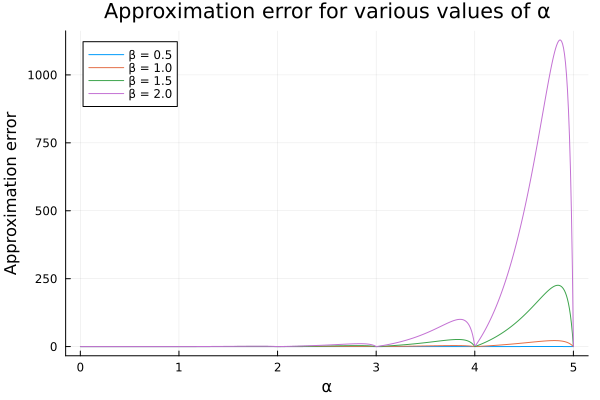

In [ ]:
#Plotting error of results from previous block of code
plt = plot(title="Approximation error for various values of α", xlabel="α", ylabel="Approximation error", legend=:topleft)
for β in betas
    plot!(plt, alphas, all_differences[β], label="β = $β")
end
display(plt)

#savefig(plt, "latex_project/figures/error_plot_exp.pdf")

In [ ]:
#Computing differences between accurate MGF and Caputo-Fabrizio MGF for fractional moments of Normal Distribution
#It has multiple parameters, so that is interesting, procedure stays the same.
mus = [0, 2]
sigmas = [1, sqrt(2)]

alphas = range(-0.95, 5, length=500)
all_differences = Dict{Tuple{Float64,Float64},Vector{Float64}}()
statistics = Dict{Tuple{Float64,Float64},Vector{Float64}}()
for μ in mus
    for σ in sigmas
        N = Normal(μ, σ)
        difference = []
        for α in alphas
            push!(difference, FractionalMoments.fractional_moment(N, α) - FractionalMoments.fractional_moment_CF(N, α))
        end
        all_differences[(μ, σ)] = difference
        statistics[(μ, σ)] = [minimum(all_differences[(μ, σ)]), maximum(all_differences[(μ, σ)]), mean(all_differences[(μ, σ)]),
            std(all_differences[(μ, σ)]), skewness(all_differences[(μ, σ)]), std(all_differences[(μ, σ)]) / mean(all_differences[(μ, σ)])]
    end
end

stat_df = DataFrame(
    mu=Float64[],
    sigma=Float64[],
    minimum=Float64[],
    maximum=Float64[],
    mean=Float64[],
    standard_deviation=Float64[],
    skewness=Float64[],
    coefficient_of_variation=Float64[]
)


for (μ, σ) in sort(collect(keys(statistics)))
    stats = statistics[(μ, σ)]
    push!(stat_df, (μ, σ, stats[1], stats[2], stats[3], stats[4], stats[5], stats[6]))
end

stat_df .= round.(stat_df, digits=3)

#save_latex_table(stat_df, "Summary Statistics", "tables/normal_statistics_table")

-Inf-10001.2864672330358045-Inf-10001.2126246789738202-Inf-10001.1530921349686225-Inf-10001.1034758503696596-Inf-10001.061122445874176-Inf-10001.0243084911194482-Inf-10000.9918524658660359-Inf-10000.9629098503251166-Inf-10000.9368565955296876-Inf-10000.9132188803873798-Inf-10000.8916287294448209-Inf-10000.8717948587802841-Inf-10000.853482888773515-Inf-10000.836501534588719-Inf-10000.8206927336730266-Inf-10000.8059244380303422-Inf-10000.7920852537794533-Inf-10000.7790803885957531-Inf-10000.766828542678835-Inf-10000.755259491926604-Inf-10000.7443121866830208-Inf-10000.7339332397983651-Inf-10000.7240757123510662-Inf-10000.7146981295655214-Inf-10000.7057636766233389-Inf-10000.697239536418315-Inf-10000.6890963403124664-Inf-10000.681307709597154-Inf-10000.6738498703229197-Inf-10000.6667013279008-Inf-10000.6598425907240553-Inf-10000.6532559342452285-Inf-10000.6469251986365201-Inf-10000.6408356144831199-Inf-10000.6349736519985081-Inf-10000.6293268900738346-Inf-10000.6238839021295997-Inf-10000.

Row,mu,sigma,minimum,maximum,mean,standard_deviation,skewness,coefficient_of_variation
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,1.0,0.0,13.439,0.298,1.07,7.898,3.591
2,0.0,1.414,0.0,9.505,0.7,1.141,2.824,1.629
3,2.0,1.0,0.0,32.123,4.517,8.055,2.269,1.783
4,2.0,1.414,0.0,91.231,11.411,22.404,2.428,1.963


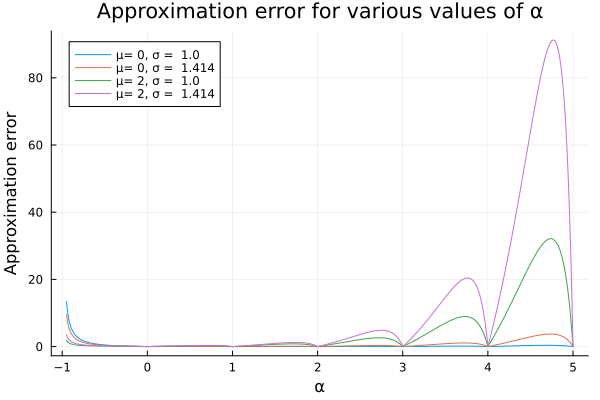

In [ ]:
#Plotting errors of the results from the previous block of code

plt = plot(title="Approximation error for various values of α", xlabel="α", ylabel="Approximation error", legend=:topleft)
for μ in mus
    for σ in sigmas
        σ_display = round(σ, digits=3)
        plot!(plt, alphas, all_differences[(μ, σ)], label="μ= $μ, σ =  $σ_display")
    end
end
display(plt)

#savefig(plt, "latex_project/figures/error_plot_normal.pdf")

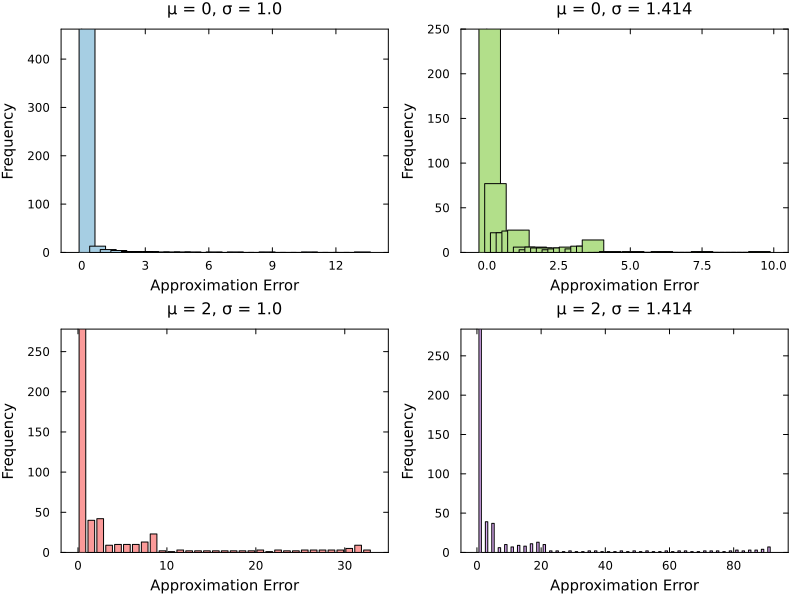

In [ ]:
#Plotting histogram depicting distribution of errors for different parameter configurations.
plt = plot(layout=(2, 2), size=(800, 600), title="Histograms of Approximation Errors")

colors = ["#A6CEE3", "#B2DF8A", "#FB9A99", "#D9A9F2"]
i = 1

for μ in mus
    for σ in sigmas
        errors = all_differences[(μ, σ)]

        histogram!(plt[i],
            errors,
            bins=50,
            xlabel="Approximation Error",
            ylabel="Frequency",
            title="μ = $μ, σ = $(round(σ, digits=3))",
            legend=false,
            normalize=false,
            bar_width=0.75,
            linecolor=:black,
            fillalpha=1,
            color=colors[i],
            framestyle=:box,
            grid=false,
            xguidefontsize=10,
            yguidefontsize=10,
            titlefontsize=11
        )
        i += 1
    end
end

display(plt)

#savefig(plt, "latex_project/figures/error_histogram.pdf")

In [ ]:
#Computing differences between accurate MGF and Caputo-Fabrizio MGF for fractional moments of Poisson Distribution
lambdas = [0.5, 1, 1.5, 2]

alphas = range(0.001, 5, length=500)
all_differences = Dict{Float64,Vector{Float64}}()
statistics = Dict{Float64,Vector{Float64}}()
for λ in lambdas
    P = Poisson(λ)
    difference = []
    for α in alphas
        push!(difference, FractionalMoments.fractional_moment(P, α) - FractionalMoments.fractional_moment_CF(P, α))
    end
    all_differences[λ] = difference
    statistics[λ] = [minimum(all_differences[λ]), maximum(all_differences[λ]), mean(all_differences[λ]), std(all_differences[λ]), skewness(all_differences[λ]), std(all_differences[λ]) / mean(all_differences[λ])]
end

stat_df = DataFrame(
    lambda=Float64[],
    minimum=Float64[],
    maximum=Float64[],
    mean=Float64[],
    standard_deviation=Float64[],
    skewness=Float64[],
    coefficient_of_variation=Float64[]
)


for λ in sort(collect(keys(statistics)))
    stats = statistics[λ]
    push!(stat_df, (λ, stats[1], stats[2], stats[3], stats[4], stats[5], stats[6]))
end

stat_df .= round.(stat_df, digits=3)

#save_latex_table(stat_df, "Summary Statistics", "tables/poisson_statistics_table")

Row,lambda,minimum,maximum,mean,standard_deviation,skewness,coefficient_of_variation
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.5,0.0,0.715,0.128,0.191,1.915,1.494
2,1.0,0.0,6.5,1.021,1.713,2.075,1.679
3,1.5,0.0,26.904,3.895,7.001,2.176,1.797
4,2.0,0.0,78.34,10.687,20.143,2.251,1.885


In [2]:
#Function to find the empirical value of a moment by simulation
function empirical_fractional_moment(samples::AbstractVector{<:Real}, alpha::Real)
    return mean(abs.(samples) .^ alpha)
end

empirical_fractional_moment (generic function with 1 method)

In [3]:
function MGF_DIST(z::ComplexF64, params::Dict, dist_name::String)
    if dist_name == "Normal"
        μ = params["μ"]
        σ = params["σ"]
        return exp(μ * z + (σ^2) * z^2 / 2)

    elseif dist_name == "Exponential"
        λ = params["λ"]
        if real(z) >= λ
            error("MGF of Exponential(λ) only defined for Re(z) < λ")
        end
        return λ / (λ - z)

    elseif dist_name == "Poisson"
        λ = params["λ"]
        return exp(λ * (exp(z) - 1))

    else
        error("Unsupported distribution: $dist_name")
    end
end


MGF_DIST (generic function with 1 method)

In [4]:
function CMGF_DIST(r::Float64, ξ::Float64, s::Float64, dist_name::String, params::Dict; tol=1e-8)
    integrand(t) = begin
        z = Complex(s, t)
        Mz = MGF_DIST(z, params, dist_name)
        M_minus_z = MGF_DIST(-z, params, dist_name)
        numerator = exp(-ξ * z) * Mz + exp(ξ * z) * M_minus_z
        real(numerator / z^(r + 1))
    end
    integral, _ = quadgk(integrand, 0, 100; rtol=tol)
    return gamma(r + 1) / π * integral
end

CMGF_DIST (generic function with 1 method)

In [29]:
lambdas = [0.5, 1, 1.5, 2]
s = 1.0
ξ = 0.0

alphas = range(0.001, 5, length=500)
results = Dict{Float64,DataFrame}()

for λ in lambdas
    P = Poisson(λ)
    samples = rand(P, 1_000_000)
    values_theoretical = Float64[]
    values_CF = Float64[]
    values_empirical = Float64[]
    values_CMGF = Float64[]
    parameters = Dict("λ" => λ)

    for α in alphas
        push!(values_theoretical, FractionalMoments.original_fractional_moment(P, α))
        push!(values_CF, FractionalMoments.original_fractional_moment_CF(P, α))
        push!(values_empirical, empirical_fractional_moment(samples, α))
        push!(values_CMGF, CMGF_DIST(α, ξ, s, "Poisson", parameters))
    end

    df = DataFrame(
        alpha=collect(alphas),
        theoretical=values_theoretical,
        CF_approx=values_CF,
        empirical=values_empirical,
        CMGF=values_CMGF
    )
    results[λ] = df
end

In [31]:
#Obtaining seperate values, so not the differences.
betas = [0.5, 1, 1.5, 2]
s = 0.2
ξ = 0.0

alphas = range(0.001, 5, length=500)
results = Dict{Float64,DataFrame}()
for β in betas
    E = Exponential(β)
    samples = rand(E, 1_000_000)
    values_theoretical = Float64[]
    values_CF = Float64[]
    values_empirical = Float64[]
    values_CMGF = Float64[]
    parameters = Dict("β" => β, "λ" => 1 / β)


    for α in alphas
        push!(values_theoretical, FractionalMoments.original_fractional_moment(E, α, use_abs=true))
        push!(values_CF, FractionalMoments.original_fractional_moment_CF(E, α))
        push!(values_empirical, empirical_fractional_moment(samples, α))
        push!(values_CMGF, CMGF_DIST(α, ξ, s, "Exponential", parameters))

    end

    df = DataFrame(
        alpha=collect(alphas),
        theoretical=values_theoretical,
        CF_approx=values_CF,
        empirical=values_empirical,
        CMGF=values_CMGF
    )
    results[β] = df
end

In [23]:
#Obtaining separate values, so not the differences.
mus = [0.0, 2.0]
sigmas = [1.0, sqrt(2)]
s = 1.0
ξ = 0.0


alphas = range(0.001, 5, length=500)
results = Dict{Tuple{Float64,Float64},DataFrame}()

for μ in mus
    for σ in sigmas
        N = Normal(μ, σ)
        samples = rand(N, 1_000_000)
        values_theoretical = Float64[]
        values_CF = Float64[]
        values_empirical = Float64[]
        values_CMGF = Float64[]
        parameters = Dict("μ" => μ, "σ" => σ)

        for α in alphas
            push!(values_theoretical, FractionalMoments.original_fractional_moment(N, α, use_abs=true))
            push!(values_CF, FractionalMoments.original_fractional_moment_CF(N, α, use_abs=true))
            push!(values_empirical, empirical_fractional_moment(samples, α))
            push!(values_CMGF, CMGF_DIST(α, ξ, s, "Normal", parameters))

        end

        df = DataFrame(
            alpha=collect(alphas),
            theoretical=values_theoretical,
            CF_approx=values_CF,
            empirical=values_empirical,
            CMGF=values_CMGF
        )
        results[(μ, σ)] = df
    end
end

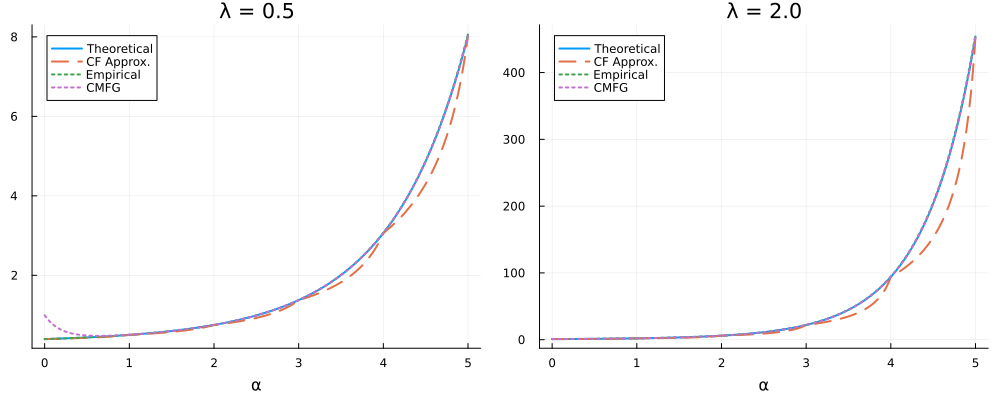

"c:\\Users\\jelle\\OneDrive\\Documenten\\GitHub\\Bachelor_Thesis\\latex_project\\figures\\value_comparison_poisson.pdf"

In [30]:
#Plotting values for various orders and parameter values
selected_lambdas = [first(lambdas), last(lambdas)]
plt = plot(layout=(1, 2), size=(1000, 400), legend=:topleft, bottom_margin=5mm, xlabel="α", ylabel="")

i = 1
for (i, λ) in enumerate(selected_lambdas)
    df = results[λ]
    plot!(df.alpha, df.theoretical, label="Theoretical", lw=2, subplot=i)
    plot!(df.alpha, df.CF_approx, label="CF Approx.", lw=2, ls=:dash, subplot=i)
    plot!(df.alpha, df.empirical, label="Empirical", lw=2, ls=:dot, subplot=i)
    plot!(df.alpha, df.CMGF, label="CMFG", lw=2, ls=:dot, subplot=i)
    title!(plt[i], "λ = $λ")
    i += 1
end

display(plt)
savefig(plt, "latex_project/figures/value_comparison_poisson.pdf")

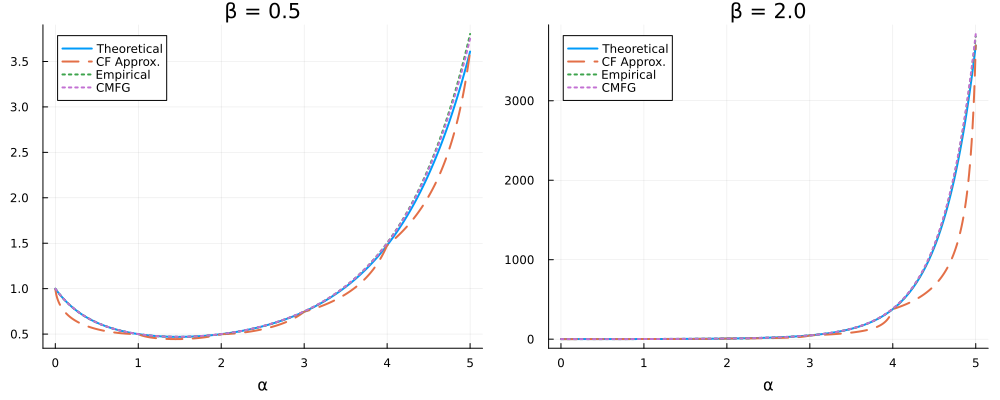

"c:\\Users\\jelle\\OneDrive\\Documenten\\GitHub\\Bachelor_Thesis\\latex_project\\figures\\value_comparison_exponential.pdf"

In [32]:
#Plotting values for various orders and parameter values
selected_betas = [first(betas), last(betas)]
plt = plot(layout=(1, 2), size=(1000, 400), legend=:topleft, bottom_margin=5mm, xlabel="α", ylabel="")

i = 1
for (i, β) in enumerate(selected_betas)
    df = results[β]
    plot!(df.alpha, df.theoretical, label="Theoretical", lw=2, subplot=i)
    plot!(df.alpha, df.CF_approx, label="CF Approx.", lw=2, ls=:dash, subplot=i)
    plot!(df.alpha, df.empirical, label="Empirical", lw=2, ls=:dot, subplot=i)
    plot!(df.alpha, df.CMGF, label="CMFG", lw=2, ls=:dot, subplot=i)
    title!(plt[i], "β = $β")
    i += 1
end

display(plt)
savefig(plt, "latex_project/figures/value_comparison_exponential.pdf")

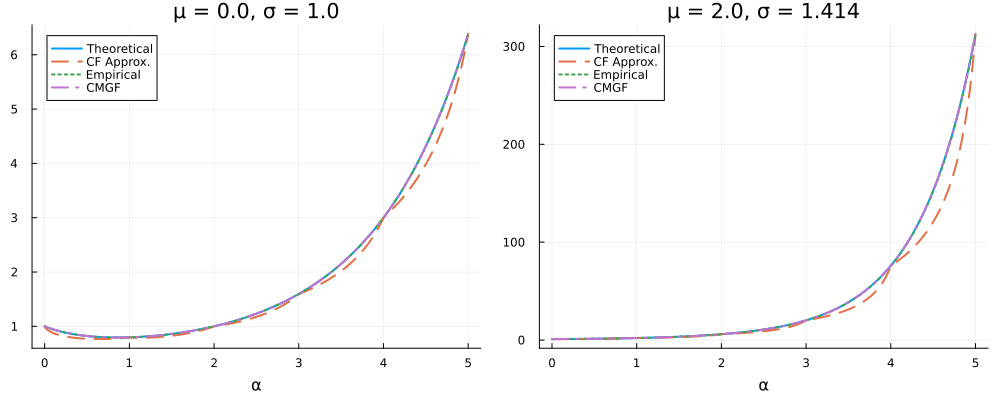

"c:\\Users\\jelle\\OneDrive\\Documenten\\GitHub\\Bachelor_Thesis\\latex_project\\figures\\normal_value_comparison_normal.pdf"

In [28]:
# Example: select first and last parameter combinations
selected_parameters = [(0.0, 1.0), (2.0, sqrt(2))]


plt = plot(layout=(1, 2), size=(1000, 400), legend=:topleft,
    xlabel="α", ylabel="", bottom_margin=5mm)

for (i, (μ, σ)) in enumerate(selected_parameters)
    df = results[(μ, σ)]

    plot!(df.alpha, df.theoretical, label="Theoretical", lw=2, subplot=i)
    plot!(df.alpha, df.CF_approx, label="CF Approx.", lw=2, ls=:dash, subplot=i)
    plot!(df.alpha, df.empirical, label="Empirical", lw=2, ls=:dot, subplot=i)
    plot!(df.alpha, df.CMGF, label="CMGF", lw=2, ls=:dashdot, subplot=i)

    title!(plt[i], "μ = $μ, σ = $(round(σ, digits=3))")
end

display(plt)
savefig(plt, "latex_project/figures/normal_value_comparison_normal.pdf")

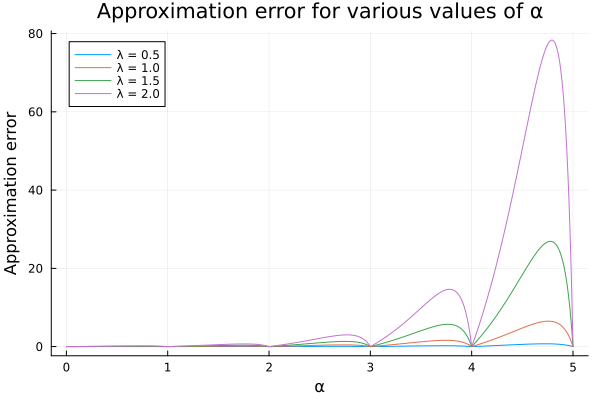

In [ ]:
#Plotting errors of results from previous block of code.
plt = plot(title="Approximation error for various values of α", xlabel="α", ylabel="Approximation error", legend=:topleft)
for λ in lambdas
    plot!(plt, alphas, all_differences[λ], label="λ = $λ")
end
display(plt)

#savefig(plt, "latex_project/figures/error_plot_poisson.pdf")